# Trainer Demo

In [3]:
# enable auto-reloading submodules
%load_ext autoreload
%autoreload 2

## Init Trainer

In [4]:
from trainer import Trainer

trainer = Trainer(
    # target pathogen
    pathogen='Escherichia coli',
    # number of folds
    n_splits=5,
    # DRIAMS sites
    sites=['A'],
    # the years of the data to load
    years=[2015, 2016, 2017, 2018],
)

## Training

In [5]:
from lightgbm import LGBMClassifier

# Ceftriaxone
trainer.fit(
    drug='Ceftriaxone',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.05,
        n_estimators=10,
    )
)
# Ciprofloxacin
trainer.fit(
    drug='Ciprofloxacin',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.02,
        n_estimators=15,
    )
)
# Cefepime
trainer.fit(
    drug='Cefepime',
    model=LGBMClassifier(
        boosting_type='gbdt',
        learning_rate=0.01,
        n_estimators=20,
    )
)

Loading Ceftriaxone...
Training w/o SMOTE...
Fold 0/5...
AUC=0.5408294930875576, ACC=0.7983870967741935, f1=0.15254237288135594
Fold 1/5...
AUC=0.5483870967741935, ACC=0.8024193548387096, f1=0.17647058823529413
Fold 2/5...
AUC=0.564516129032258, ACC=0.8094758064516129, f1=0.2285714285714286
Fold 3/5...
AUC=0.5599078341013825, ACC=0.8074596774193549, f1=0.2139917695473251
Fold 4/5...
AUC=0.5552995391705069, ACC=0.8054435483870968, f1=0.19917012448132781
Training w/ SMOTE...
Fold 0/5...
AUC=0.7535483870967742, ACC=0.8326612903225806, f1=0.6157407407407408
Fold 1/5...
AUC=0.7291244239631337, ACC=0.8256048387096774, f1=0.5831325301204819
Fold 2/5...
AUC=0.7450691244239632, ACC=0.8245967741935484, f1=0.6009174311926605
Fold 3/5...
AUC=0.7636866359447004, ACC=0.8407258064516129, f1=0.6325581395348837
Fold 4/5...
AUC=0.7569585253456219, ACC=0.8457661290322581, f1=0.6295399515738498
Loading Ciprofloxacin...
Training w/o SMOTE...
Fold 0/5...
AUC=0.5, ACC=0.7147302904564315, f1=0.0
Fold 1/5...
A

## Results Collection

In [6]:
results = trainer.collect_results()
# export the results to csv files
# results.save_to('./results/test')

## Bar Graph

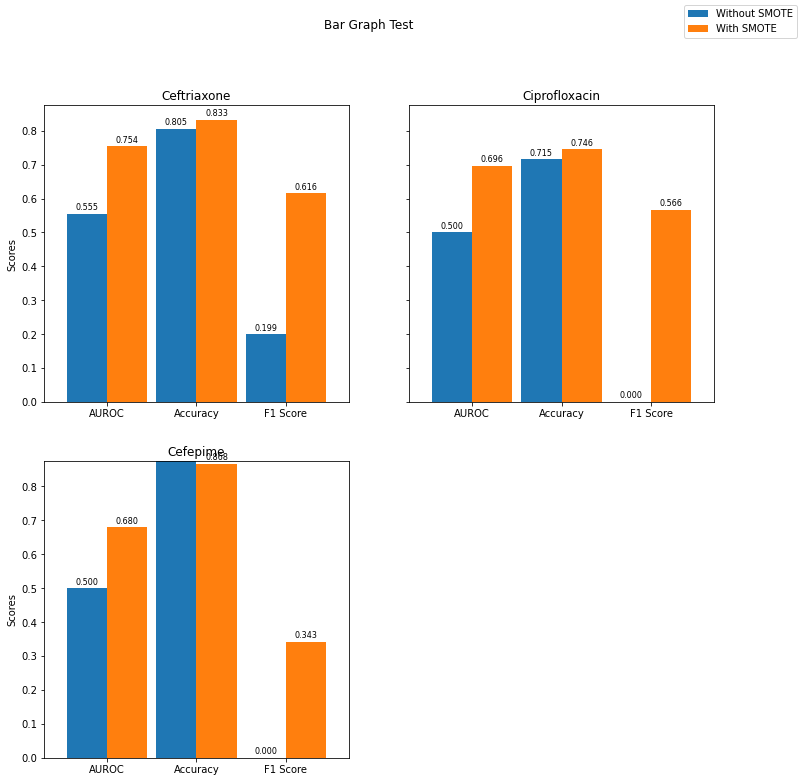

In [14]:
results.bar_plot(
    title='Bar Graph Test',
    # save_as='./results/test/bar.png',
    # drugs=['Ceftriaxone', 'Ciprofloxacin', 'Cefepime'],
    nrows=2,
    ncols=2,
    sharey=True,
    figsize=(12, 12),
)

## Box Graph

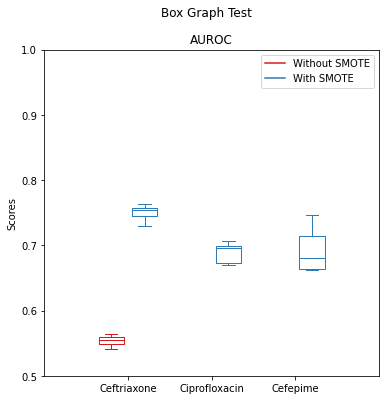

In [26]:
results.box_plot(
    title='Box Graph Test',
    metrics=['AUROC'], # plot AUROC only
    y_lim=[0.5, 1.0], # set view limits for y-axis
    figsize=(6, 6),
    # save_as='./plots/box_test.png',
)
